
---
# Les expressions régulières

---

Les expressions régulières (ou regex) sont des séquences de caractères qui définissent un motif de recherche, permettant de manipuler, valider ou extraire du texte selon des règles précises.
Elles servent notamment à automatiser des tâches comme la recherche de mots, la validation de formats (emails, numéros de téléphone), ou le remplacement de chaînes dans des fichiers ou des bases de données.

<div class="alert alert-block alert-success">
<b>IMPORTANT :  Comme dans tous langage, python compris, Il existe des caractères qui sont dit réservés, ils ont un sens spécifique pour les REGEX. Par exemple le point . symbolise n'importe qu'elle caractère. On les appel "méta-caractères". </b>
</div>

### Liste des méta-caractères des REGEX

    . ^ $ * + ? { } [ ] \ | ( )

---

## Import d'une librairie spécifique (module)

---

Python propose des fonctions qui sont utilisables sans aucune action de votre part. Pour d'autre il faut lui indiquer qu'on souhaite utiliser des fonctionnalités
spécifiques. les REGEX font parties de la seconde catégories.

On utilise pour cela le mot import

    import nomDeLaLibrairie

Il y a utilisera les fonctionnalités de la façon suivante :

    nomDeLaLibrairie.fonction()


In [1]:
# Exemple lorsqu'on n'a pas importé la librairie, on déclenche une erreur :

#  __all_ qui est une commande qui affiche tous ce qu'on pourra demander à la librairie.
print(re.__all__)

NameError: name 're' is not defined

Les expressions régulières, en Anglais : REGular EXpression sont souvent désigné par le nom REGEX. Le module python est encore plus concis et se nomme ```re``` .

In [3]:
import re

# Exemple avec __all_ qui est une commande qui affiche tous ce qu'on pourra demander à la librairie.
print(re.__all__)


['match', 'fullmatch', 'search', 'sub', 'subn', 'split', 'findall', 'finditer', 'compile', 'purge', 'escape', 'error', 'Pattern', 'Match', 'A', 'I', 'L', 'M', 'S', 'X', 'U', 'ASCII', 'IGNORECASE', 'LOCALE', 'MULTILINE', 'DOTALL', 'VERBOSE', 'UNICODE', 'NOFLAG', 'RegexFlag', 'PatternError']


TypeError: findall() missing 2 required positional arguments: 'pattern' and 'string'


---

## Les principales fonctions proposées par le module REGEX

---

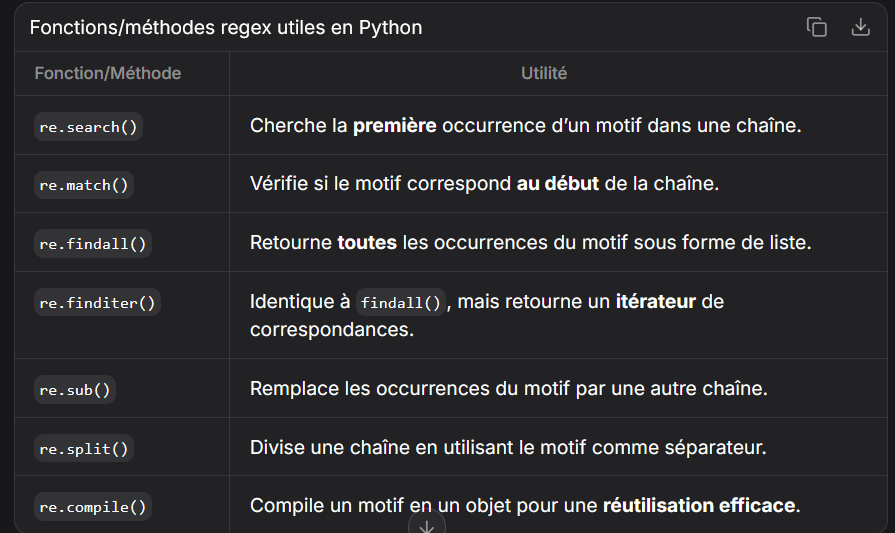


---

### 1. méthode search()

---

Renvoi le premier motif trouvé, on se sert de cette méthode pour répondre à la question : Le motif est-il présent dans le texte ?

In [18]:
import re

with open("../ressources/kpop-lyrics.txt","r") as f:
    paroles = f.read() # place le contenu dans un seul str contenant les \n


# Vous pouvez décommenter si vous souhaiter voir le contenu du fichier
# print(paroles)

motRecherche = "golden"

print("")
match = re.search(motRecherche,paroles)
print(match)

# Exemple de code pour savoir si le mot est présent
if re.search(motRecherche ,paroles):
    print("Mot présent dans le text")
else:
    print("Mot non présent dans le text")

# A FAIRE : Modifier le motRecherche en "Délivré"



<re.Match object; span=(510, 516), match='golden'>
Mot présent dans le text


---

### 2. Focus sur re.Match ce que renvoi les méthodes search(), match() et finditer()

---

Regardons en détail les informations contenu dans l'objet re.Match :



In [22]:
import re

texte = "Contact : user@example.com"
# Les parenthèses servent a créer des groupes de captures
#                   (  1 gr )@(  2 gr )
match = re.search(r"([\w.-]+)@([\w.-]+)", texte)

if match:
    print("Correspondance entière :", match.group())      # 'user@example.com'
    print("Nom d'utilisateur :", match.group(1))          # 'user'
    print("Domaine :", match.group(2))                    # 'example.com'
    print("Position :", match.span())                     # (10, 26)
    print("Début :",match.start())                        # 10
    print("Fin :", match.end())                           # 26
    print("Chaîne originale :", match.string)             # 'Contact : user@example.com'


Correspondance entière : user@example.com
Nom d'utilisateur : user
Domaine : example.com
Position : (10, 26)
Début : 10
Fin : 26
Chaîne originale : Contact : user@example.com


---

### 3. méthode match()

---

Cette méthode sert a valider une chaine de caractère. L'utilisation la plus courante est la validation du format d'un mot de passe losqu'on le change.

Voici un exemple de code qui vérifie le mot de passe suis les règles suivnte :

- Au moins 8 caractères
- Au moins une majuscule ([A-Z])
- Au moins une minuscule ([a-z])
- Au moins un chiffre (\d)
- Au moins un caractère spécial ([!@#$%^&*(),.?":{}|<>])

In [24]:
import re

def valider_mot_de_passe(mot_de_passe):
    # Motif regex pour valider le mot de passe
    # Ce motif est complexe et fonctionne grace a ?= en début de chaque groupe qui permet
    motif = r'^(?=.*[A-Z])(?=.*[a-z])(?=.*\d)(?=.*[!@#$%^&*(),.?":{}|<>]).{8,}$'

    if re.match(motif, mot_de_passe):
        print("✅ Mot de passe valide !")
    else:
        print("❌ Mot de passe invalide. Vérifie les règles :")
        print("- 8 caractères minimum")
        print("- Au moins une majuscule, une minuscule, un chiffre et un caractère spécial")

# Exemple d'utilisation
mot_de_passe = input("Saisis ton mot de passe : ")
valider_mot_de_passe(mot_de_passe)


✅ Mot de passe valide !


---

### 4. méthode findall()

---

Méthode qui va renvoyer la liste des chaines de caractères qui valide le motif. On n'a pas d'objet match et on ne pourra pas récupérer les information sur la position. Si on a besoin de ces informations, il faudra utiliser finditer().

In [30]:
import re

with open("../ressources/kpop-lyrics.txt","r") as f:
    paroles = f.read() # place le contenu dans un seul str contenant les \n


# Vous pouvez décommenter si vous souhaiter voir le contenu du fichier
# print(paroles)

motRecherche = "golden"

print("")
match = re.findall(motRecherche,paroles)
print(match)

# Le code suivant vous donne l'information qu'il y a au moin un match mais vous n'avez pas plus d'information
if re.findall(motRecherche ,paroles):
    print("Mot présent au moins une fois dans le text")
else:
    print("Mot non présent dans le text")

# A FAIRE : Modifier le motRecherche en "Délivré"



['golden', 'golden', 'golden', 'golden', 'golden']
Mot présent dans le text


---

### 5. méthode finditer()

---

Méthode qui va renvoyer une liste d'objet re.Match, on va pouvoir récuperer les informations sur leurs positions.

In [68]:
import re

with open("../ressources/kpop-lyrics.txt","r", encoding="utf-8") as f:
    paroles = f.read() # place le contenu dans un seul str contenant les \n


# Vous pouvez décommenter si vous souhaiter voir le contenu du fichier
# print(paroles)

motRecherche = "golden"

print("")
match = re.finditer(motRecherche,paroles)
print(match)

# Exemple de code pour savoir si le mot est présent
if match:
    print("Mot présent dans le text")
    for mot in match:
        print(type(mot), mot)
        print(mot.group())

else:
    print("Mot non présent dans le text")

# A FAIRE : Modifier le motRecherche en "Délivré"


Mot présent dans le text
<class 're.Match'> <re.Match object; span=(510, 516), match='golden'>
golden
<class 're.Match'> <re.Match object; span=(586, 592), match='golden'>
golden
<class 're.Match'> <re.Match object; span=(1067, 1073), match='golden'>
golden
<class 're.Match'> <re.Match object; span=(1151, 1157), match='golden'>
golden
<class 're.Match'> <re.Match object; span=(1309, 1315), match='golden'>
golden


---

### 6. méthode sub()

---

Méthode qui qui va remplacer les motif trouvé par un paramètre.

In [31]:
import re

texte = """
Contactez-nous :
- Support : support@example.com
- Ventes : ventes@entreprise.fr
- Urgent : urgent.contact@admin.net
"""

# Remplace le nom d'utilisateur par des étoiles
texte_anonymise = re.sub(
    r"([\w.-]+)@",  # Motif : capture tout avant le "@"
    "*****@",       # Remplace par "****@"
    texte           # Texte de recherche
)

# Si un paramètre par ligne pour pose des soucis de compréhension, voici l'écriture normal:
# texte_anonymise = re.sub(r"([\w.-]+)@", "*****@", texte)

print(texte_anonymise)



Contactez-nous :
- Support : *****@example.com
- Ventes : *****@entreprise.fr
- Urgent : *****@admin.net



Voici un exemple avancé ou le paramètre de remplacement est une méthode qui va permetre de ne pas avoir un remplacement fixe :

In [33]:
import re

# La méthode doit prendre un match en paramètre et retourner une chaine de caractère
def dms_to_decimal(match):
    # Récupère les groupes capturés
    degres = float(match.group(1))
    minutes = float(match.group(2))
    secondes = float(match.group(3) or 0)  # Gère l'absence de secondes
    hemisphere = match.group(4)  # N/S ou E/W

    # Conversion en décimal
    decimal = degres + minutes / 60 + secondes / 3600
    if hemisphere in ('S', 'W'):
        decimal *= -1  # Ajuste pour les hémisphères sud/ouest
    return f"{decimal:.4f}"

texte = """
Paris : 48°51'24" N, 2°17'40" E
New York : 40°42'51" N, 74°0'21" W
"""

# Motif regex pour capturer DMS (degrés-minutes-secondes)
texte_converti = re.sub(
    r"(\d+)°(\d+)'(\d+)\"?\s*([NSEW])",  # Groupes : degrés, minutes, secondes, hémisphère
    dms_to_decimal,
    texte
)

print(texte)
print("")
print(texte_converti)



Paris : 48°51'24" N, 2°17'40" E
New York : 40°42'51" N, 74°0'21" W



Paris : 48.8567, 2.2944
New York : 40.7142, -74.0058



---

# Exercices

---

Nous allons utiliser le texte contenu dans regex.txt et devoir rechercher différentes informations.

---

## 1. recherche des nom propre

---

Pour avoir les noms propres, on va rechercher les mots commencant par une majuscules.
On va avoir beaucoup de faux positifs avec les majuscules de début de phrase mais pas le choix.


In [95]:
import re

with open("../ressources/regex.txt","r", encoding="utf-8") as f:
    texte  = f.read()


# A vous de jouer
result = re.findall(r"TAPER ICI LE REGEX",texte)
print(result)

# Pour enlever les doublons, on peut transformer la list en set.
# Un set est une liste sans doublon, python va alors supprimer les doublons
print("\n SANS DOUBLONS")
print(set(result))


[]

 SANS DOUBLONS
set()


---

## Filter les mots avec un dictionnaire

---

On peut utiliser un module python assez compliquer à  installer :

https://pyenchant.github.io/pyenchant/install.html


Le code suivant ne fonctionne que si on a installer les dictionnaires en plus du module python

In [50]:

import enchant

# Initialiser le dictionnaire français
dico = enchant.Dict("fr_FR")

# Vérifier si un mot est correct
for mot in set(result):
    if dico.check(mot):
        print(f"Le mot '{mot}' est correct.")
    else:
        print(f"Le mot '{mot}' est incorrect.")


AttributeError: module 'enchant' has no attribute 'Dict'

---

BONUS

---

In [49]:
# C'est cadeau, la vérification sur internet si c'est un nom commum, présent dans le dictionnaire Le Robert
# Vous devez d'abord avoir la liste au dessus et le traitement prend plus de 10 sec

import requests
def verifier_mot(mot):
    url = f"https://dictionnaire.lerobert.com/definition/{mot}"
    response = requests.get(url)
    return response.status_code == 200

motPropre = []

for mot in set(result):
    if not verifier_mot(mot):
        motPropre.append(mot)

print("\n NOMS PROPRES")
print(motPropre)



 MOT PROPRE
['Lucas', 'Clara']


---

## 2. recherche des adresses mails

---



In [39]:
import re

with open("../ressources/regex.txt","r", encoding="utf-8") as f:
    texte  = f.read()


# A vous de jouer


['Le', 'Lucas', 'La', 'Chercheur', 'La', 'Envoyer', 'Lucas', 'Radar', 'Un', 'Plus', 'Appeler', 'Urgent', 'Lucas', 'Une', 'Rencontre', 'Concorde', 'Ne', 'Clara', 'Mais', 'La', 'Il', 'Engage', 'Soudain', 'Un', 'Si', 'Lucas', 'Qui', 'Il', 'Il', 'Je', 'Puis', 'Une', 'Vous', 'Bien', 'Mais', 'Le', 'Lucas', 'Je', 'Et', 'Il', 'Peut', 'Ou', 'Alors']
SANS DOUBLONS
{'Radar', 'Un', 'Il', 'Envoyer', 'Si', 'Engage', 'Urgent', 'La', 'Lucas', 'Et', 'Concorde', 'Clara', 'Mais', 'Qui', 'Une', 'Je', 'Rencontre', 'Peut', 'Le', 'Chercheur', 'Soudain', 'Bien', 'Vous', 'Plus', 'Puis', 'Appeler', 'Alors', 'Ou', 'Ne'}


---

## 3. recherche des numéros de téléphone +33 6 ... ou 06 ...

---



In [ ]:
import re

with open("../ressources/regex.txt","r", encoding="utf-8") as f:
    texte  = f.read()


# A vous de jouer


---

## 4. Recherche les dates

---

Dates : 12 octobre 2025, 31/12/2025, 05-05-2026, 1er janvier 2026.

- easy : 31/12/2025, 05-05-2026
- hard : 12 octobre 2025 et 1er janvier 2026

In [ ]:
import re

with open("../ressources/regex.txt","r", encoding="utf-8") as f:
    texte  = f.read()


# A vous de jouer


---

## 5. Les palindromes

---

- easy : « radar », , « kayak », « été », « non »
- hard « ressasser », « Élu par cette crapule »

In [ ]:
import re

with open("../ressources/regex.txt","r", encoding="utf-8") as f:
    texte  = f.read()


# A vous de jouer


---

## 6. Le code secret

---

Le code secret est un nombre qui est dans une citation entre un point d'exclamation et un point d'intérogation.

- easy : Sortir la citation contenant le code
- hard : utiliser un groupe capturant pour récuperer le code

In [97]:
import re

with open("../ressources/regex.txt","r", encoding="utf-8") as f:
    texte  = f.read()

# print(texte)

# A vous de jouer
result = re.search(r"TAPER ICI LE REGEX",texte)

if result:
    print(result.group())
    # A décommenté si vous utilisé un groupe capturant -> ('code')
    # print("Le code est : ",result.groups()[0])